# Tools and Methods of Data Analysis
## Session 5 - Part 2

Niels Hoppe <<niels.hoppe.extern@srh.de>>

In [1]:
import numpy as np
import seaborn as sns
from scipy import stats

### Confidence Intervals

1. Calculate confidence interval
    * for population mean
    * for population proportion
2. Determine sample size
    * for population mean
    * for population proportion

### Reminder: Generalization and Transfer of Findings

* Findings are always limited to the studied sample.
* Findings from representative samples can be generalized to the population.
* Findings can not generally be transferred to another population.
* Even if two populations are technically comparable, there may be unknown parameters in play.

### Point Estimates

Population parameters can be estimated from a sample:

| Parameter  | Population | Sample |
|------------|------------|--------|
| Proportion | pi         | p |
| Mean       | mu         | X |

Experiment

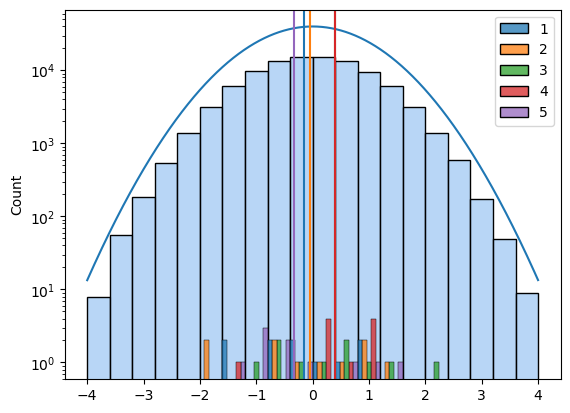

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

def histplot(data, color_palette, color):
    sns.histplot(data, stat='count',
                 bins=20, binrange=(-4, 4),
                 color=color_palette[color],
                 log_scale=(False, True),
                 multiple='dodge',)#discrete=True)

def meanplot(data, color_palette, color):
    plt.axvline(data.mean(), 0, 1, color=color_palette[color])


def sample(size, n=1):
    
    population = pd.Series(stats.norm.rvs(0, 1, size=100000))
    samples = pd.DataFrame({ i: population.sample(n=size) for i in range(1, n+1) })
    
    x = np.arange(-4, 4, 0.001)
    norm_values = stats.norm.pdf(x, 0, 1) * 100000

    plt.plot(x, norm_values)

    histplot(population, sns.color_palette('pastel'), 0)
    #meanplot(population, sns.color_palette('bright'), 0)

    histplot(samples, sns.color_palette('pastel'), 0)
    for i, mu in enumerate(samples.mean()):
        #meanplot(sample, sns.color_palette('bright'), i+1)
        plt.axvline(mu, 0, 1, color=sns.color_palette()[i])

    plt.show()

sample(10, 5)

### Calculate CI for the Mean

A sample of 11 circuits from a large normal population has a mean resistance of 2.20 ohms.
We know from past testing that the population standard deviation is .35 ohms.  
Determine a 95% confidence interval for the true mean resistance of the population.

In [29]:
import math
from scipy import stats

stats.t.interval(0.95,
            df = 11 - 1,
            loc = 2.2,
            scale = 0.35 / math.sqrt(11)
            )

(1.964866800593334, 2.4351331994066663)

In [30]:
import math
from scipy import stats

def t_interval(confidence, series):
    n = series.size
    return stats.t.interval(confidence,
                            df = n - 1,
                            loc = series.mean(),
                            scale = series.std() / math.sqrt(n)
                            )


In [31]:
import math
from scipy import stats

def t_interval(confidence, series, alternative='two-sided'):
    if alternative == 'less':
        p_tail = 1 - confidence
        lb, ub = 0, 1 - p_tail
    elif alternative == 'greater':
        p_tail = 1 - confidence
        lb, ub = p_tail, 1
    else: # elif alternative == 'two-sided':
        p_tail = (1 - confidence) / 2
        lb, ub = p_tail, 1 - p_tail
    return stats.t.ppf([lb, ub],
            df = series.size - 1,
            loc = series.mean(),
            scale = series.std() / math.sqrt(series.size)
            )

### Calculate CI for Proportion

A random sample of 100 people shows that 25 are left-handed.
Form a 95% confidence interval for the true proportion of left-handers

In [32]:
from statsmodels.stats.proportion import proportion_confint

proportion_confint(25, 100, 1 - 0.95)

(0.1651310699442871, 0.3348689300557129)

In [33]:
from statsmodels.stats.proportion import proportion_confint

def prop_interval(confidence, success, total):
    return proportion_confint(success, total, 1 - confidence)

### Determining Sample Size

* for mean
* for proportion

### Determining Sample Size for Mean

If `σ = 45`, what sample size is needed to estimate the mean within `± 5` with `90%` confidence?

In [34]:
def critical_value_norm(alpha):
    return stats.norm.ppf(1 - (alpha) / 2)

def samplesize_confint_norm(std, half_length, alpha):
    z = critical_value_norm(alpha)
    return (z**2 * std**2) / half_length**2

samplesize_confint_norm(45, 5, 1 - 0.9)

219.14901978172847

### Determining Sample Size for Proportion

How large a sample would be necessary to estimate the true proportion defective in a large population within `±3%`, with `95%` confidence? Assume a pilot sample yields `p = .12`.

In [35]:
from statsmodels.stats.proportion import samplesize_confint_proportion

samplesize_confint_proportion(proportion=.12, half_length=0.03, alpha=.05)

450.7311682947776